In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
df.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes


In [ ]:
df.dtypes

outlook        object
temperature    object
humidity       object
windy            bool
play           object
dtype: object

In [ ]:
for cols in df.columns:
  print(df[cols].unique())

['overcast' 'rainy' 'sunny']
['hot' 'cool' 'mild']
['high' 'normal']
[False  True]
['yes' 'no']


In [ ]:
df.describe()

,outlook,temperature,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,rainy,mild,high,False,yes
freq,5,6,7,8,9


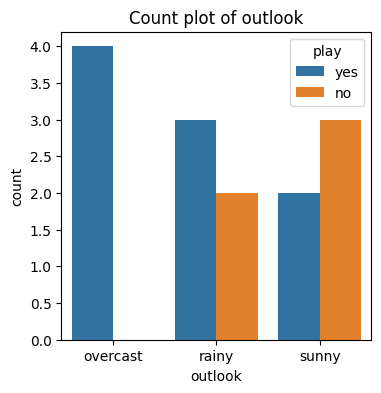

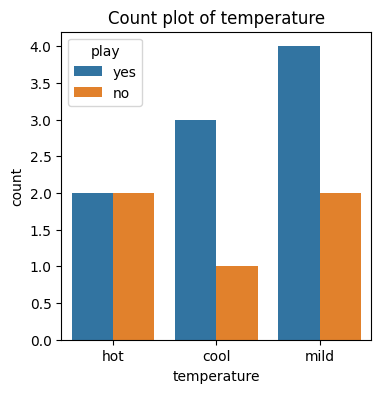

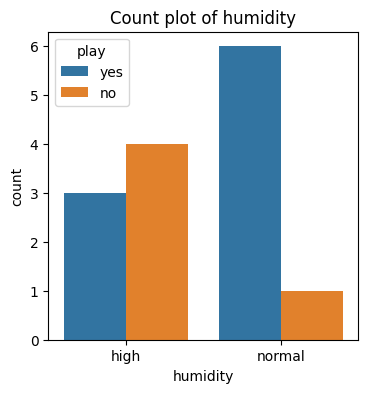

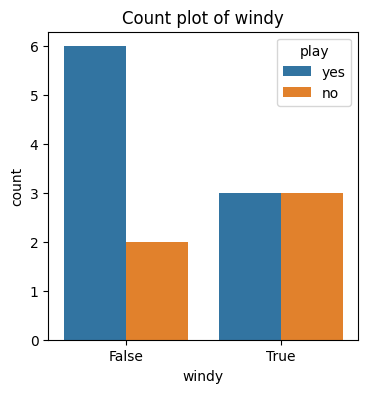

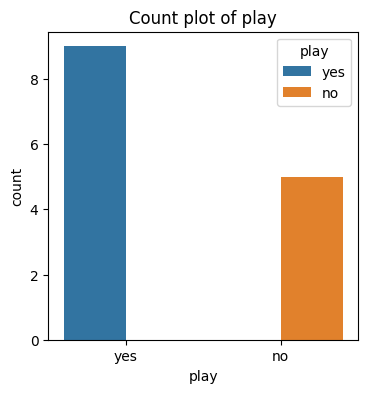

In [ ]:
for col in df.columns:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=col, data=df, hue='play')
    plt.title(f'Count plot of {col}')
    plt.show()

## Creating Decision Tree Model

In [ ]:
df_2 = pd.get_dummies(df,drop_first=True)

In [ ]:
df_2['windy'] = df_2['windy'].astype(int)

In [ ]:
for cols in df.columns:
  print(df[cols].unique())

['overcast' 'rainy' 'sunny']
['hot' 'cool' 'mild']
['high' 'normal']
[False  True]
['yes' 'no']


In [ ]:
df_2.head()

,windy,outlook_rainy,outlook_sunny,temperature_hot,temperature_mild,humidity_normal,play_yes
0,0,0,0,1,0,0,1
1,1,0,0,0,0,1,1
2,1,0,0,0,1,0,1
3,0,0,0,1,0,1,1
4,0,1,0,0,1,0,1


In [ ]:
X = df_2.drop('play_yes', axis=1)
y = df_2['play_yes']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (9, 6)
X_test:  (5, 6)
y_train:  (9,)
y_test:  (5,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6
